In [131]:
#Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

import pandas as pd 

# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
plt.style.use('fivethirtyeight')

from fbprophet import Prophet as proph

In [132]:
data=pd.read_excel('US Data.xlsx')
ts=data[['Date','Last Price']]
ts.rename(columns={'Date': 'ds', 'Last Price': 'y'}, inplace=True)
train=int(len(ts)*0.9)
train_data=ts[:train]
test_data=ts[train:]
test_dates=test_data.drop('y',axis=1)
test_y=test_data.y


In [133]:
train_data.head()

,ds,y
0,2014-02-03,71.6471
1,2014-02-04,72.6843
2,2014-02-05,73.2271
3,2014-02-06,73.2157
4,2014-02-07,74.2400


In [134]:
model = proph(interval_width=0.95)
model.fit(train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [135]:
forecast=model.predict(test_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-09,202.577144,174.447379,210.479676,202.577144,202.577144,-10.113100,-10.113100,-10.113100,0.161662,0.161662,0.161662,-10.274762,-10.274762,-10.274762,0.0,0.0,0.0,192.464044
1,2019-01-10,202.653083,175.388111,209.445823,202.653083,202.653083,-9.947686,-9.947686,-9.947686,-0.135397,-0.135397,-0.135397,-9.812289,-9.812289,-9.812289,0.0,0.0,0.0,192.705397
2,2019-01-11,202.729022,175.888282,212.518566,202.729022,202.729022,-9.664815,-9.664815,-9.664815,-0.312173,-0.312173,-0.312173,-9.352642,-9.352642,-9.352642,0.0,0.0,0.0,193.064207
3,2019-01-14,202.956839,178.340617,211.728625,202.928955,202.968434,-8.472547,-8.472547,-8.472547,-0.409580,-0.409580,-0.409580,-8.062967,-8.062967,-8.062967,0.0,0.0,0.0,194.484292
4,2019-01-15,203.032778,178.948136,212.807244,202.978929,203.055699,-7.565672,-7.565672,-7.565672,0.117751,0.117751,0.117751,-7.683424,-7.683424,-7.683424,0.0,0.0,0.0,195.467106


In [136]:
my_pred = test_dates.tail(138)
y_pred=forecast['yhat']
my_pred['val'] = y_pred.values

my_pred.set_index('ds', inplace=True)

test_data.set_index('ds', inplace=True)
test_data.head()

,y
ds,
2019-01-09,153.31
2019-01-10,153.80
2019-01-11,152.29
2019-01-14,150.00
2019-01-15,153.07


MSE of prophet forecast is:  671.6116602215176


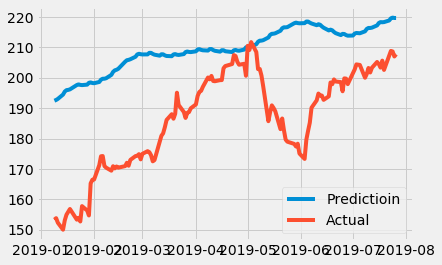

In [137]:
plt.plot(my_pred, label='Predictioin')
plt.plot(test_data, label='Actual')
plt.legend()

mse=mean_squared_error(test_y, forecast.yhat)
print ('MSE of prophet forecast is: ', mse)

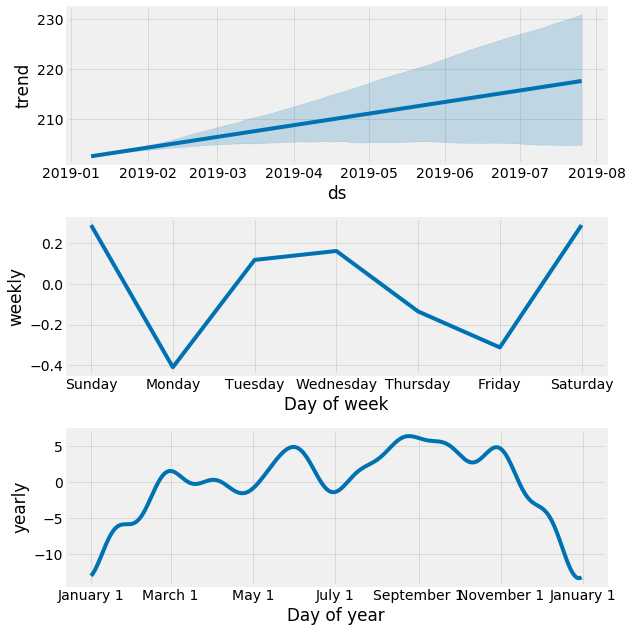

In [138]:
model.plot_components(forecast)
plt.show()

In [139]:
#try to differencing 

In [140]:
train_diff=train_data.diff(periods=1)
train_diff.ds=train_data.ds.values
train_diff.dropna()
train_diff.head()

test_diff=test_data.diff(periods=1)
print(test_data.head())
print(test_diff.head())

                 y
ds                
2019-01-09  153.31
2019-01-10  153.80
2019-01-11  152.29
2019-01-14  150.00
2019-01-15  153.07
               y
ds              
2019-01-09   NaN
2019-01-10  0.49
2019-01-11 -1.51
2019-01-14 -2.29
2019-01-15  3.07


In [141]:
model = proph(interval_width=0.95)
model.fit(train_diff)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [142]:
forecast=model.predict(test_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-09,0.082502,-4.065792,4.289164,0.082502,0.082502,-0.066420,-0.066420,-0.066420,-0.049858,-0.049858,-0.049858,-0.016562,-0.016562,-0.016562,0.0,0.0,0.0,0.016082
1,2019-01-10,0.082140,-4.231977,4.189340,0.082140,0.082140,-0.302667,-0.302667,-0.302667,-0.291231,-0.291231,-0.291231,-0.011436,-0.011436,-0.011436,0.0,0.0,0.0,-0.220528
2,2019-01-11,0.081777,-4.089942,4.336503,0.081777,0.081777,-0.343831,-0.343831,-0.343831,-0.333019,-0.333019,-0.333019,-0.010812,-0.010812,-0.010812,0.0,0.0,0.0,-0.262054
3,2019-01-14,0.080689,-4.227162,4.188123,0.080671,0.080710,-0.024287,-0.024287,-0.024287,0.007584,0.007584,0.007584,-0.031870,-0.031870,-0.031870,0.0,0.0,0.0,0.056402
4,2019-01-15,0.080327,-4.184134,3.997969,0.080303,0.080355,-0.178382,-0.178382,-0.178382,-0.133793,-0.133793,-0.133793,-0.044589,-0.044589,-0.044589,0.0,0.0,0.0,-0.098056


In [143]:
def rebuild_diffed(series, first_element_original):
    cumsum = series.cumsum()
    return cumsum.fillna(0) + first_element_original

In [144]:
my_pred = test_dates.tail(138)
y_pred=forecast['yhat']
restore= pd.concat([train_diff.y, y_pred])
rebuild= rebuild_diffed(restore, train_data.y[0])


In [145]:
my_pred['val'] = rebuild.tail(138).values

my_pred.set_index('ds', inplace=True)
my_pred.tail()

,val
ds,
2019-07-22,144.342555
2019-07-23,144.425035
2019-07-24,144.582302
2019-07-25,144.490943
2019-07-26,144.352654


MSE of prophet forecast is:  35141.61937073615


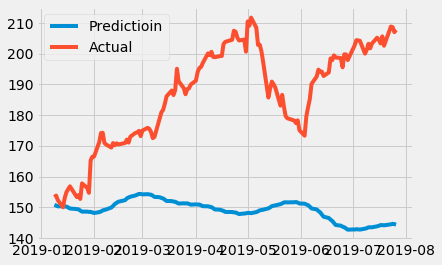

In [146]:
plt.plot(my_pred, label='Predictioin')
plt.plot(test_data, label='Actual')
plt.legend()

mse=mean_squared_error(test_y, forecast.yhat)
print ('MSE of prophet forecast is: ', mse)